# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mukhlis Maulana Al-Fakih
- **Email:** mukhlis.maulanaalf@gmail.com
- **ID Dicoding:** alfakih

## Menentukan Pertanyaan Bisnis

- Produk atau kategori produk mana yang paling banyak terjual dan memiliki potensi peningkatan penjualan?
- Siapa pelanggan paling bernilai dan bagaimana karakteristik pelanggan yang melakukan pembelian berulang?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
customer_data = pd.read_csv('data/olist_customers_dataset.csv')
geo_data = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items_data = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments_data = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews_data = pd.read_csv('data/olist_order_reviews_dataset.csv')
orders_data = pd.read_csv('data/olist_orders_dataset.csv')
products_data = pd.read_csv('data/olist_products_dataset.csv')
sellers_data = pd.read_csv('data/olist_sellers_dataset.csv')
product_category_data = pd.read_csv('data/product_category_name_translation.csv')


**Insight:**

<ul>
    <li><strong>Customer-Centric Analysis:</strong> Dataset ini menyediakan informasi yang cukup untuk melakukan
      analisis berbasis pelanggan, baik untuk melihat distribusi geografis pelanggan, frekuensi pembelian, hingga ulasan
      produk.</li>
    <li><strong>Product-Centric Analysis:</strong> Data produk dan pesanan dapat memberikan insight mengenai produk
      terlaris, kategori yang paling laris, dan produk dengan potensi untuk lebih dipromosikan.</li>
    <li><strong>Operational Analysis:</strong> Melalui data pengiriman, kita bisa menganalisis efektivitas logistik dan
      pengaruhnya terhadap kepuasan pelanggan.</li>
    <li><strong>Segmentasi Pelanggan:</strong> Dataset memungkinkan untuk melakukan segmentasi pelanggan berdasarkan
      perilaku pembelian (RFM) serta mengidentifikasi pelanggan bernilai tinggi untuk strategi pemasaran yang tepat.
    </li>
  </ul>


### Assessing Data

**Membuat fungsi untuk mempermudah proses assessing data**

In [3]:
def assess_data(path, date_columns=None):
    # 1. Memuat dataset dari path yang diberikan
    try:
        dataset = pd.read_csv(path)
        print(f"Dataset loaded successfully from {path}")
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return
    
    # 2. Menampilkan beberapa baris pertama
    print("\n--- First 5 Rows of Data ---")
    print(dataset.head())
    
    # 3. Menampilkan informasi struktur dataset
    print("\n--- Dataset Information ---")
    print(dataset.info())
    
    # 4. Memeriksa missing values
    print("\n--- Missing Values ---")
    missing_values = dataset.isnull().sum()
    print(missing_values[missing_values > 0])
    
    # 5. Memeriksa duplikasi
    duplicates = dataset.duplicated().sum()
    print(f"\n--- Number of Duplicate Rows: {duplicates}")
    
    # 6. Mengonversi kolom tanggal (jika ada)
    if date_columns:
        for col in date_columns:
            if col in dataset.columns:
                dataset[col] = pd.to_datetime(dataset[col], errors='coerce')
                print(f"Converted {col} to datetime format.")
    
    # 7. Menampilkan deskripsi statistik untuk data numerik
    print("\n--- Statistical Summary ---")
    print(dataset.describe())
    
    # 8. Menampilkan distribusi data untuk kolom kategorikal
    print("\n--- Value Counts for Categorical Columns ---")
    for col in dataset.select_dtypes(include='object').columns:
        print(f"\n{col} value counts:")
        print(dataset[col].value_counts().head(10))  # Menampilkan 10 nilai terbanyak
    
    return dataset

In [4]:
# Dataset order_items_data
order_items_data = assess_data('data/olist_order_items_dataset.csv', date_columns=['shipping_limit_date'])

Dataset loaded successfully from data/olist_order_items_dataset.csv

--- First 5 Rows of Data ---
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19

In [5]:
# Dataset product_data
products_data = assess_data('data/olist_products_dataset.csv')

Dataset loaded successfully from data/olist_products_dataset.csv

--- First 5 Rows of Data ---
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0        

In [6]:
# Dataset customer_data
customer_data = assess_data('data/olist_customers_dataset.csv')

Dataset loaded successfully from data/olist_customers_dataset.csv

--- First 5 Rows of Data ---
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

--- Dataset Information ---
<class 'pandas.core.frame.Da

In [7]:
# Dataset orders_data
orders_data = assess_data('data/olist_orders_dataset.csv')

Dataset loaded successfully from data/olist_orders_dataset.csv

--- First 5 Rows of Data ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-

In [8]:
# Dataset product_category_data
product_category_data = assess_data('data/product_category_name_translation.csv')

Dataset loaded successfully from data/product_category_name_translation.csv

--- First 5 Rows of Data ---
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

--- Missing Values ---
Series([], dtype: int64)

--- Number of Duplicate Rows: 0

--- Statistical Summary ---
       product_category_name produc

**Insight:**
    <p><strong><code>order_items_data</code></strong>:</p>
    <ul>
      <li>Missing values: <strong>0</strong> (Tidak ada nilai yang hilang).</li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <p><strong><code>products_data</code></strong>:</p>
    <ul>
      <li>Missing values:<ul>
          <li><code>product_category_name</code>: <strong>610</strong> missing values.</li>
          <li><code>product_name_lenght</code>: <strong>610</strong> missing values.</li>
          <li><code>product_description_lenght</code>: <strong>610</strong> missing values.</li>
          <li><code>product_photos_qty</code>: <strong>610</strong> missing values.</li>
          <li><code>product_weight_g</code>: <strong>2</strong> missing values.</li>
          <li><code>product_length_cm</code>: <strong>2</strong> missing values.</li>
          <li><code>product_height_cm</code>: <strong>2</strong> missing values.</li>
          <li><code>product_width_cm</code>: <strong>2</strong> missing values.</li>
        </ul>
      </li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <p><strong><code>customer_data</code></strong>:</p>
    <ul>
      <li>Missing values: <strong>0</strong> (Tidak ada nilai yang hilang).</li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <p><strong><code>orders_data</code></strong>:</p>
    <ul>
      <li>Missing values:<ul>
          <li><code>order_approved_at</code>: <strong>160</strong> missing values.</li>
          <li><code>order_delivered_carrier_date</code>: <strong>1783</strong> missing values.</li>
          <li><code>order_delivered_customer_date</code>: <strong>2965</strong> missing values.</li>
        </ul>
      </li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <p><strong><code>product_category_data</code></strong>:</p>
    <ul>
      <li>Missing values: <strong>0</strong> (Tidak ada nilai yang hilang).</li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <h3><strong>Kesimpulan</strong></h3>
    <p>
    Melihat jumlah missing values yang relatif kecil dibandingkan dengan ukuran dataset secara keseluruhan, sehingga tidak akan terlalu berdampak signifikan pada analisis. Maka proses cleaning data nanti akan dilakukan dengan cara menghapus data yang memiliki missing value tanpa mengganti nilainya.
    </p>

### Cleaning Data

In [9]:
# Dataset products_data
products_data_cleaned = products_data.dropna()

# Dataset orders_data
orders_data_cleaned = orders_data.dropna()

**Insight:**
- <code>Cleanup Products Data</code>
- <code>Cleanup Orders Data</code>

## Exploratory Data Analysis (EDA)

### Explore Tren Product

In [10]:
# Menghitung total penjualan per produk
product_sales = order_items_data.groupby('product_id')['price'].sum().reset_index()
product_sales = product_sales.sort_values(by='price', ascending=False)
product_sales

,product_id,price
24086,bb50f2e236e5eea0100680137654686c,63885.00
14068,6cdd53843498f92890544667809f1595,54730.20
27613,d6160fb7873f184099d9bc95e30376af,48899.34
27039,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51
19742,99a4788cb24856965c36a24e339b6058,43025.56
...,...,...
6086,2e8316b31db34314f393806fd7b6e185,2.99
13461,680cc8535be7cc69544238c1d6a83fe8,2.90
17767,8a3254bee785a526d548a81a9bc3c9be,2.55
6388,310dc32058903b6416c71faff132df9e,2.29


In [11]:
# Menggabungkan dengan data kategori produk bahasa Inggris
product_sales = product_sales.merge(products_data[['product_id', 'product_category_name']], on='product_id', how='left')
product_sales = product_sales.merge(product_category_data, on='product_category_name', how='left')
product_sales


,product_id,price,product_category_name,product_category_name_english
0,bb50f2e236e5eea0100680137654686c,63885.00,beleza_saude,health_beauty
1,6cdd53843498f92890544667809f1595,54730.20,beleza_saude,health_beauty
2,d6160fb7873f184099d9bc95e30376af,48899.34,pcs,computers
3,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51,informatica_acessorios,computers_accessories
4,99a4788cb24856965c36a24e339b6058,43025.56,cama_mesa_banho,bed_bath_table
...,...,...,...,...
32946,2e8316b31db34314f393806fd7b6e185,2.99,papelaria,stationery
32947,680cc8535be7cc69544238c1d6a83fe8,2.90,pet_shop,pet_shop
32948,8a3254bee785a526d548a81a9bc3c9be,2.55,construcao_ferramentas_construcao,construction_tools_construction
32949,310dc32058903b6416c71faff132df9e,2.29,papelaria,stationery


In [12]:
# Menghitung total penjualan per kategori produk
category_sales = product_sales.groupby('product_category_name_english')['price'].sum().reset_index()
category_sales = category_sales.sort_values(by='price', ascending=False)
category_sales


,product_category_name_english,price
43,health_beauty,1258681.34
70,watches_gifts,1205005.68
7,bed_bath_table,1036988.68
65,sports_leisure,988048.97
15,computers_accessories,911954.32
...,...,...
35,flowers,1110.04
46,home_comfort_2,760.27
11,cds_dvds_musicals,730.00
29,fashion_childrens_clothes,569.85


### Explore Customers Behavior

In [13]:
# Konversi kolom tanggal pembelian menjadi format datetime
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])

# Mengambil tanggal paling akhir dalam dataset
current_date = orders_data['order_purchase_timestamp'].max()

# Menghitung Recency (jarak waktu antara transaksi terakhir pelanggan dan current_date)
recency = orders_data.groupby('customer_id').order_purchase_timestamp.max().reset_index()
recency['Recency'] = (current_date - recency['order_purchase_timestamp']).dt.days
recency.sort_values(by=['Recency'], ascending=False)

,customer_id,order_purchase_timestamp,Recency
3354,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,772
40289,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34,772
38013,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:19,764
52277,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,762
68946,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52,744
...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,2018-09-29 09:13:03,18
74611,bf6181a85bbb4115736c0a8db1a53be3,2018-10-01 15:30:09,16
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,2018-10-03 18:55:29,13
51713,856336203359aa6a61bf3826f7d84c49,2018-10-16 20:16:02,0


In [14]:
# Menghitung Frequency (total transaksi per pelanggan)
frequency = orders_data.groupby('customer_id').order_id.count().reset_index()
frequency.columns = ['customer_id', 'Frequency']
frequency.sort_values(by=['Frequency'], ascending=False)

,customer_id,Frequency
99440,ffffe8b65bbe3087b653a978c870db99,1
99424,fff5169e583fd07fac9fec88962f189d,1
99423,fff4fdd0de70a51d4e0f57a4c1c6bfae,1
99422,fff4f0c85a4d710abe06599e1ed08a42,1
99421,fff415b4c72e09483a25c15108c65d31,1
...,...,...
5,0004164d20a9e969af783496f3408652,1
4,000379cdec625522490c315e70c7a9fb,1
3,0002414f95344307404f0ace7a26f1d5,1
2,0001fd6190edaaf884bcaf3d49edf079,1


In [15]:
# Menghitung Monetary (total pengeluaran per pelanggan)
monetary = order_items_data.groupby('order_id')['price'].sum().reset_index()
monetary = monetary.merge(orders_data[['order_id', 'customer_id']], on='order_id', how='left')
monetary = monetary.groupby('customer_id')['price'].sum().reset_index()
monetary.columns = ['customer_id', 'Monetary']
monetary.sort_values(by=['Monetary'], ascending=False)

,customer_id,Monetary
8475,1617b1357756262bfa56ab541c47bc16,13440.00
91284,ec5b2ba62e574342386871631fafd3fc,7160.00
76948,c6e2731c5b391845f6800c97401a43a9,6735.00
94398,f48d464a0baaea338cb25f816991ab1f,6729.00
24603,3fd6777bbce08a352fddd04e4a7cc8f6,6499.00
...,...,...
81496,d2c63ad286e3ca9dd69218008d61ff81,2.90
9383,184e8e8e48937145eb96c721ef1f0747,2.29
64612,a790343ca6f3fee08112d678b43aa7c5,2.20
8483,161b6d415e8b3413c6609c70cf405b5a,0.85


In [16]:
# Menggabungkan nilai Recency, Frequency, dan Monetary
rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')
rfm

,customer_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,337,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,458,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,596,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,427,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,198,1,93.00
...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,214,1,78.00
98662,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,202,1,54.90
98663,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,148,1,47.90
98664,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,126,1,199.90


In [17]:
# Memberikan skor RFM (1-4) berdasarkan kuartil
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  # Semakin kecil Recency, semakin tinggi skornya
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# Menggabungkan skor R, F, dan M untuk mendapatkan skor RFM
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [18]:
# Membuat segmentasi berdasarkan RFM Score
def segment_customer(rfm):
    if rfm['RFM_Score'] == '444':
        return 'Best Customer'
    elif rfm['R_Score'] == '4':
        return 'Loyal Customer'
    elif rfm['F_Score'] == '1':
        return 'At Risk'
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

**Insight:**
<ul>
  <code>Tren Product by Category</code>
  <li><strong>Produk paling laris berdasarkan kategori</strong> adalah beleza_saude/ atau dalam bahasa inggris adalah health_beauty</li>  
</ul>
<ul>
  <code>Customer behavior</code>
  <li></li>
  <li></li>
</ul>

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk atau kategori produk mana yang paling banyak terjual dan memiliki potensi peningkatan penjualan?

C:\Users\mukhl\AppData\Local\Temp\ipykernel_7888\2826939472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name_english', data=category_sales.head(10), palette='viridis')


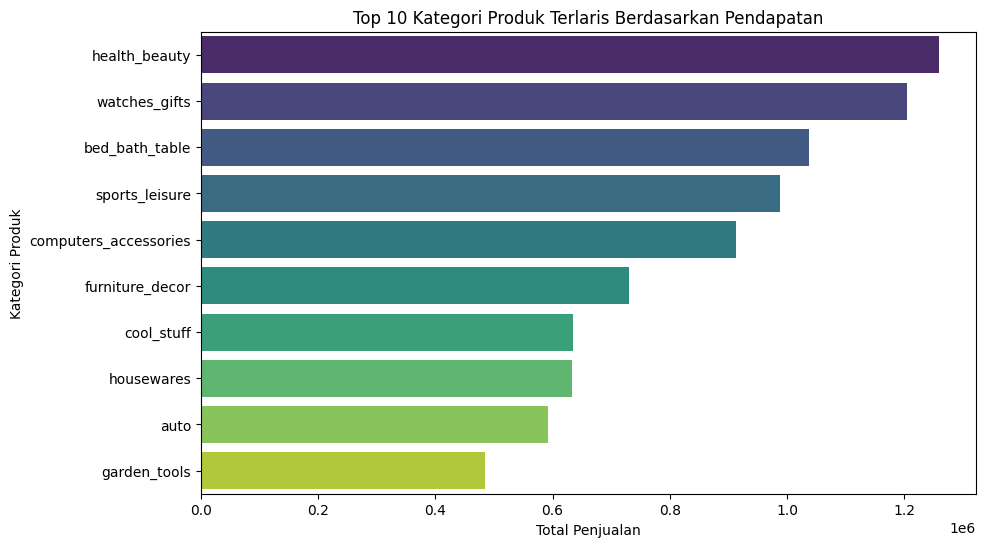

In [20]:
# Bar chart penjualan per kategori
plt.figure(figsize=(10,6))
sns.barplot(x='price', y='product_category_name_english', data=category_sales.head(10), palette='viridis')
plt.title('Top 10 Kategori Produk Terlaris Berdasarkan Pendapatan')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

### Pertanyaan 2: Siapa pelanggan paling bernilai dan bagaimana karakteristik pelanggan yang melakukan pembelian berulang?

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2